In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

# 3. naloga: osnovna naloga, čas maksimuma in celotno število obolelih 

dD/dt = - alfa D B

dB/dt = alfa DB - beta B

dI/dt = beta B

In [2]:



D0 = 1
B0 = 1e-6
I0 = 0

ND=100 #Čas opazovanja
TS=0.5 #Korak
INPUT = np.array([D0, B0, I0])


@interact(alfa=FloatSlider(min=0, max=4, step=0.1), beta=0.14286)
def plotaj(alfa, beta, **kwargs):

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    plt.figure(figsize=(10,5))
    plt.plot(t_range, RES[:,0], label="Dovzetni")
    plt.plot(t_range, RES[:,1], label="Bolni")
    plt.plot(t_range, RES[:,2], label="Imuni")
    plt.xlabel("Čas (arbitrarne enote)")
    plt.ylabel("Delež populacije")
    plt.legend()
    plt.title(r"$\alpha$: {alfa}, $\beta$: {beta}, $B_0$: {I0}".format(alfa = alfa, beta =beta, I0=B0))
    if "shrani" in kwargs:
        if kwargs["shrani"]:
            plt.savefig("prvidelalfa{}beta{}.pdf".format(alfa, beta))
            plt.savefig("prvidelalfa{}beta{}.jpg".format(alfa, beta))
    plt.show()

#interact(plotaj, alfa=widgets.FloatSlider(min=0, max=4, step=0.1),
#                beta=widgets.FloatSlider(min=0, max=2, step=0.1))

interactive(children=(FloatSlider(value=0.0, description='alfa', max=4.0), FloatSlider(value=0.14286, descript…

In [62]:
def cas_maksimuma(alfa, beta):
    D0 = 1
    B0 = 1e-6
    I0 = 0

    ND=100 #Čas opazovanja
    TS=0.5
    INPUT = np.array([D0, B0, I0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return np.argmax(RES[:,1])

def maksimum(alfa, beta):
    D0 = 1
    B0 = 1e-6
    I0 = 0

    ND=100 #Čas opazovanja
    TS=0.01
    INPUT = np.array([D0, B0, I0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return np.max(RES[:,1])

In [4]:
cas_maksimuma(4, 0.2)

9

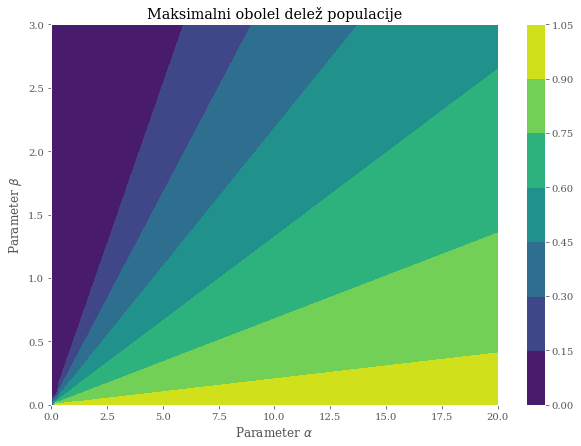

In [63]:
def gridaj(f):
    rezultat = [[],[],[]]
    for alfa in np.linspace(0, 20, num=100):
        print("{:0.2f} od 20".format(alfa), end="\r")
        for beta in np.linspace(0, 3, num=100):
            rezultat[0].append(alfa)
            rezultat[1].append(beta)
            rezultat[2].append(f(alfa, beta))
    return rezultat
a = gridaj(maksimum)
plt.figure(figsize=(10,7))
plt.tricontourf(a[0], a[1],a[2])
plt.colorbar()
plt.xlabel(r"Parameter $\alpha$")
plt.ylabel(r"Parameter $\beta$")
plt.title("Maksimalni obolel delež populacije")
plt.savefig("maksoboleldelez2.pdf")
plt.savefig("maksoboleldelez2.jpg")
plt.show()#

In [19]:
len(a[1])

10000

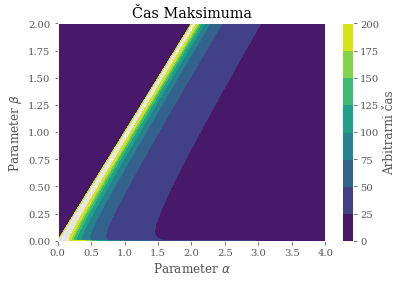

In [26]:
def gridaj(f):
    N = 1000
    rezultat = [[],[],[]]
    for alfa in np.linspace(0, 4, num=N):
        print(alfa, end="\r")
        for beta in np.linspace(0, 2, num=N):
            rezultat[0].append(alfa)
            rezultat[1].append(beta)
            rezultat[2].append(f(alfa, beta))
    return rezultat

a = gridaj(cas_maksimuma)
plt.tricontourf(a[0], a[1],a[2])
plt.colorbar(label="Arbitrarni čas")
plt.xlabel(r"Parameter $\alpha$")
plt.ylabel(r"Parameter $\beta$")
plt.title("Čas Maksimuma")
plt.savefig("cas_maksimuma4.pdf")
plt.savefig("cas_maksimuma4.jpg")
plt.show()

## Poskušam raziskati oscilacije v maksimalnem deležu populacije, denimo pro beta = 0.5:

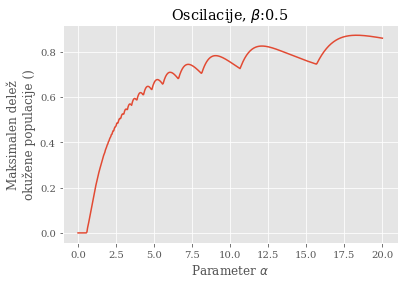

In [15]:
alfa = np.linspace(0, 20, 512)


plt.plot(alfa, [maksimum(a, 0.5) for a in alfa])
plt.xlabel(r"Parameter $\alpha$")
plt.ylabel("Maksimalen delež\nokužene populacije ()")
plt.title(r"Oscilacije, $\beta$:0.5")
plt.savefig("oscilacije.pdf")
plt.savefig("oscilacije.jpg")
plt.show()

## Poskušam zmanjšati korak in toleranco integratorja

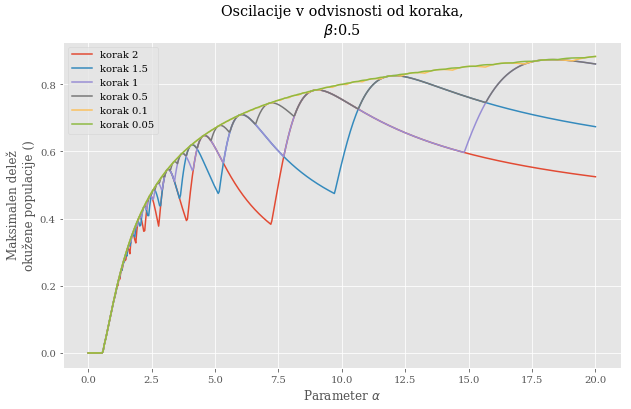

In [30]:
def maksimum(alfa, beta, TS):
    D0 = 1
    B0 = 1e-6
    I0 = 0

    ND=100 #Čas opazovanja
    
    INPUT = np.array([D0, B0, I0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return np.max(RES[:,1])

alfa = np.linspace(0, 20, 512)
plt.figure(figsize=(10, 6))
for korak in [2,1.5,1, 0.5, 0.1, 0.05]:
    plt.plot(alfa, [maksimum(a, 0.5, korak) for a in alfa], label="korak {}".format(korak))
plt.legend()
plt.xlabel(r"Parameter $\alpha$")
plt.ylabel("Maksimalen delež\nokužene populacije ()")
plt.title(r"""Oscilacije v odvisnosti od koraka,
$\beta$:0.5""")
plt.savefig("oscilacije2.pdf")
plt.savefig("oscilacije2.jpg")
plt.show()

Napravimo več razredov z različnimi prehajanji

D: dovzetni

B1: prvi stadij, umirajo, ratujejo imuni in prehajajo v drugi stadij

B2: drugi stadij, umirajo, ratujejo imuni

I: imuni, prehajajo v dovzetne

U: umrli, ne prehajajo nikamor

In [56]:


D0 = 1
B_1_0 = 1e-6
B_2_0 = 0
U0 = 0
I0 = 0

ND=200 #Čas opazovanja
TS=0.02 #Korak
INPUT = np.array([D0, B_1_0, B_2_0, I0, U0])


#@interact(alfa=1.4247, beta=0.14286)
def plotaj(alfa, beta1, beta2, beta3, gama1, gama2, delta, **kwargs):

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((5))
        V = INP
        Y[0] = - alfa * V[0]*V[1] + delta*V[3]
        Y[1] = alfa * V[0]*V[1] - (beta1+beta2+beta3) * V[1]
        Y[2] = beta1 * V[1]-(gama1+gama2)*V[2]
        Y[3] = gama1*V[2] + beta3*V[1] - delta*V[3]
        Y[4] = beta2*V[1] + gama2 * V[2]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    plt.figure(figsize=(10,5))
    plt.plot(t_range, RES[:,0], label="Dovzetni")
    plt.plot(t_range, RES[:,1], label="1.stadij")
    plt.plot(t_range, RES[:,2], label="2.stadij")
    plt.plot(t_range, RES[:,3], label="Imuni")
    plt.plot(t_range, RES[:,4], label="Umrli", c="k")
    plt.xlabel("Čas (arbitrarne enote)")
    plt.ylabel("Delež populacije")
    plt.legend()
    plt.title(r"""$\alpha$: {}, $\beta_1$: {}, $\beta_2$: {}, $\beta_3$: {},
    $\gamma_1$: {}, $\gamma_2$: {},$\delta$: {}""".format(alfa, beta1, beta2, beta3, gama1, gama2, delta))
    if "shrani" in kwargs:
        if kwargs["shrani"]:
            ime = "prvidel{}{}{}{}{}{}{}".format(alfa, beta1, beta2, beta3, gama1, gama2, delta)
            print("Shranjeno! {}".format(ime))
            plt.savefig("{}.pdf".format(ime))
            plt.savefig("{}.jpg".format(ime))
    plt.show()

interact(plotaj,
         alfa=widgets.FloatSlider(min=0, max=8, step=0.1, value=4),
         beta1=widgets.FloatSlider(min=0, max=4, step=0.1, value=2),
         beta2=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
         beta3=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.5),
         gama1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.2),
         gama2=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.02),
         delta=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
         shrani=False
        )

interactive(children=(FloatSlider(value=4.0, description='alfa', max=8.0), FloatSlider(value=2.0, description=…

<function __main__.plotaj(alfa, beta1, beta2, beta3, gama1, gama2, delta, **kwargs)>

In [51]:



#@interact(alfa=1.4247, beta=0.14286)
def plotaj(alfa, beta1, beta2, beta3, gama1, gama2, delta, cepljenih, **kwargs):
    D0 = 1 - cepljenih
    B_1_0 = 1e-6
    B_2_0 = 0
    U0 = 0
    I0 = cepljenih

    ND=200 #Čas opazovanja
    TS=0.02 #Korak
    INPUT = np.array([D0, B_1_0, B_2_0, I0, U0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((5))
        V = INP
        Y[0] = - alfa * V[0]*V[1] + delta*V[3]
        Y[1] = alfa * V[0]*V[1] - (beta1+beta2+beta3) * V[1]
        Y[2] = beta1 * V[1]-(gama1+gama2)*V[2]
        Y[3] = gama1*V[2] + beta3*V[1] - delta*V[3]
        Y[4] = beta2*V[1] + gama2 * V[2]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    plt.figure(figsize=(10,5))
    plt.plot(t_range, RES[:,0], label="Dovzetni")
    plt.plot(t_range, RES[:,1], label="1.stadij")
    plt.plot(t_range, RES[:,2], label="2.stadij")
    plt.plot(t_range, RES[:,3], label="Imuni")
    plt.plot(t_range, RES[:,4], label="Umrli", c="k")
    plt.xlabel("Čas (arbitrarne enote)")
    plt.ylabel("Delež populacije")
    plt.legend()
    plt.title(r"""$\alpha$: {}, $\beta_1$: {}, $\beta_2$: {}, $\beta_3$: {},
    $\gamma_1$: {}, $\gamma_2$: {},$\delta$: {}""".format(alfa, beta1, beta2, beta3, gama1, gama2, delta))
    if "shrani" in kwargs:
        if kwargs["shrani"]:
            plt.savefig("prvidel{}{}{}{}{}{}{}.pdf".format(alfa, beta1, beta2, beta3, gama1, gama2, delta))
            plt.savefig("prvidel{}{}{}{}{}{}{}.jpg".format(alfa, beta1, beta2, beta3, gama1, gama2, delta))
    plt.show()

interact(plotaj,
         alfa=widgets.FloatSlider(min=0, max=8, step=0.1, value=4),
         beta1=widgets.FloatSlider(min=0, max=4, step=0.1, value=2),
         beta2=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
         beta3=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.5),
         gama1=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.2),
         gama2=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.02),
         delta=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
         cepljenih=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
         shrani=False
        )

interactive(children=(FloatSlider(value=4.0, description='alfa', max=8.0), FloatSlider(value=2.0, description=…

<function __main__.plotaj(alfa, beta1, beta2, beta3, gama1, gama2, delta, cepljenih, **kwargs)>

# To do: za enostavnejši model pripravi še cepljenje

In [73]:




#@interact(alfa=1.4247, beta=0.14286)
def plotaj(alfa, beta, cepljenih, **kwargs):

    D0 = 1-cepljenih
    B0 = 1e-6
    I0 = cepljenih

    ND=100 #Čas opazovanja
    TS=0.2 #Korak
    INPUT = np.array([D0, B0, I0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    #cepljenih = 0
    
    D02 = 1
    B02 = 1e-6
    I02 = 0

    ND=100 #Čas opazovanja
    TS=0.2 #Korak
    INPUT2 = np.array([D02, B02, I02])
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES2 = odeint(diff_eqs,INPUT2,t_range)
    
    
    plt.figure(figsize=(10,5))
    plt.plot(t_range, RES[:,0], label="D - cep.")
    plt.plot(t_range, RES[:,1], label="B- cep.")
    plt.plot(t_range, RES[:,2], label="I - cep.")
    if "pokazi_necepljene" in kwargs:
        if kwargs["pokazi_necepljene"]:
            plt.scatter(t_range, RES2[:,0], label="D - necep.", s=2)
            plt.scatter(t_range, RES2[:,1], label="B - necep.", s=2)
            plt.scatter(t_range, RES2[:,2], label="I - necep.", s=2)
    plt.xlabel("Čas (arbitrarne enote)")
    plt.ylabel("Delež populacije")
    plt.legend()
    plt.title(r"$\alpha$: {alfa}, $\beta$: {beta}, $B_0$: {I0}, cepljenih: {c}".format(alfa = alfa,
                                                                       beta =beta,
                                                                       I0=B0,
                                                                        c=cepljenih))
    if "shrani" in kwargs:
        if kwargs["shrani"]:
            plt.savefig("prvidelalfa{}beta{}cepljenih{}.pdf".format(alfa, beta,cepljenih))
            plt.savefig("prvidelalfa{}beta{}cepljenih{}.jpg".format(alfa, beta,cepljenih))
    plt.show()

interact(plotaj, alfa=widgets.FloatSlider(min=0, max=8, step=0.1, value=2),
                 beta=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                cepljenih=widgets.FloatSlider(min=0, max=1, step=0.05, value=.1), shrani=False, pokazi_necepljene=True)

interactive(children=(FloatSlider(value=2.0, description='alfa', max=8.0), FloatSlider(value=1.0, description=…

<function __main__.plotaj(alfa, beta, cepljenih, **kwargs)>

## Kako je vrh in čas epidemije odvisen od deleža cepljenih?

<Figure size 720x504 with 0 Axes>

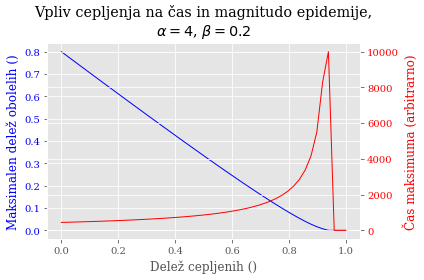

In [85]:
def cas_maksimuma(cepljenih, alfa=4, beta=0.2):
    D0 = 1-cepljenih
    B0 = 1e-6
    I0 = 0+cepljenih

    ND=100 #Čas opazovanja
    TS=0.01
    INPUT = np.array([D0, B0, I0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return np.argmax(RES[:,1])

def maksimum(cepljenih, alfa=4, beta=0.2):
    D0 = 1-cepljenih
    B0 = 1e-6
    I0 = 0+cepljenih

    ND=100 #Čas opazovanja
    TS=0.01
    INPUT = np.array([D0, B0, I0])

    def diff_eqs(INP,t):
        '''The main set of equations'''
        Y=np.zeros((3))
        V = INP
        Y[0] = - alfa * V[0]*V[1]
        Y[1] = alfa * V[0]*V[1] - beta * V[1]
        Y[2] = beta * V[1]
        return Y   # For odeint

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT,t_range)
    return np.max(RES[:,1])
N=50
arej = np.zeros((3,N))
for i, c in enumerate(np.linspace(0, 1, num=N)):
    arej[0,i] = c
    arej[1, i] = maksimum(c)
    arej[2, i] = cas_maksimuma(c)
    
    
plt.figure(figsize=(10, 7))
fig, ax =plt.subplots(1)
# Plot y1 vs x in blue on the left vertical axis.
plt.xlabel("Delež cepljenih ()")
plt.ylabel("Maksimalen delež obolelih ()", color="b")
plt.tick_params(axis="y", labelcolor="b")
plt.plot(arej[0,:],arej[1,:], "b-", linewidth=1)
plt.title(r"""Vpliv cepljenja na čas in magnitudo epidemije,
$\alpha = 4$, $\beta = 0.2$""")
#fig.autofmt_xdate(rotation=50)
 
# Plot y2 vs x in red on the right vertical axis.
plt.twinx()
plt.ylabel("Čas maksimuma (arbitrarno)", color="r")
plt.tick_params(axis="y", labelcolor="r")
plt.plot(arej[0,:],arej[2,:], "r-", linewidth=1)
  
plt.tight_layout(w_pad=1.1)
#To save your graph
plt.savefig('vplivcepljenjamagnitudacas2.pdf')
plt.savefig('vplivcepljenjamagnitudacas2.jpg')
plt.show()